# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [98]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

#Load csv file
city_df = pd.read_csv("Resources/city_data.csv")
ride_df = pd.read_csv("Resources/ride_data.csv")

ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [99]:
# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [100]:
#  1. Get the total rides for each city type
total_rides = merge_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [101]:
# 2. Get the total drivers for each city type
total_drivers = city_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [102]:
#  3. Get the total amount of fares for each city type
total_fares = merge_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [103]:
#  4. Get the average fare per ride for each city type. 
total_avg_fares = merge_df.groupby(["type"]).mean()["fare"]
total_avg_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [104]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = total_fares / total_drivers
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [105]:
#  6. Create a PyBer summary DataFrame. 

type_summary_df = pd.DataFrame({
    "Total Rides" : total_rides,
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fares,
    "Total Avg. Fares" : total_avg_fares,
    "Avg. Driver Fare" : avg_driver_fare})

type_summary_df

,Total Rides,Total Drivers,Total Fares,Total Avg. Fares,Avg. Driver Fare
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [106]:
#  7. Cleaning up the DataFrame. Delete the index name
type_summary_df.index.name = None

In [107]:
#  8. Format the columns.
type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:.0f}".format)

type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map('${:,.2f}'.format)

type_summary_df["Total Avg. Fares"] = type_summary_df["Total Avg. Fares"].map('${:,.2f}'.format)
                                                                              
type_summary_df["Avg. Driver Fare"] = type_summary_df["Avg. Driver Fare"].map('${:,.2f}'.format)

type_summary_df

,Total Rides,Total Drivers,Total Fares,Total Avg. Fares,Avg. Driver Fare
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [108]:
# 1. Read the merged DataFrame
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [109]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_date_type_fare = merge_df.groupby(["date","type"]).sum()["fare"]
sum_date_type_fare

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [110]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_date_type_fare = sum_date_type_fare.reset_index()
sum_date_type_fare

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [111]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_table = pd.pivot_table(sum_date_type_fare, values="fare", index="date", columns="type")

pivot_table.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [112]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

loc_pivot_table = pivot_table.loc["2019-01-01" : "2019-04-29"]
loc_pivot_table.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [113]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

loc_pivot_table.index = pd.to_datetime(loc_pivot_table.index)

In [114]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [115]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
loc_pivot_table_res = loc_pivot_table.resample('W').sum()

loc_pivot_table_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [116]:
loc_pivot_table_res.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


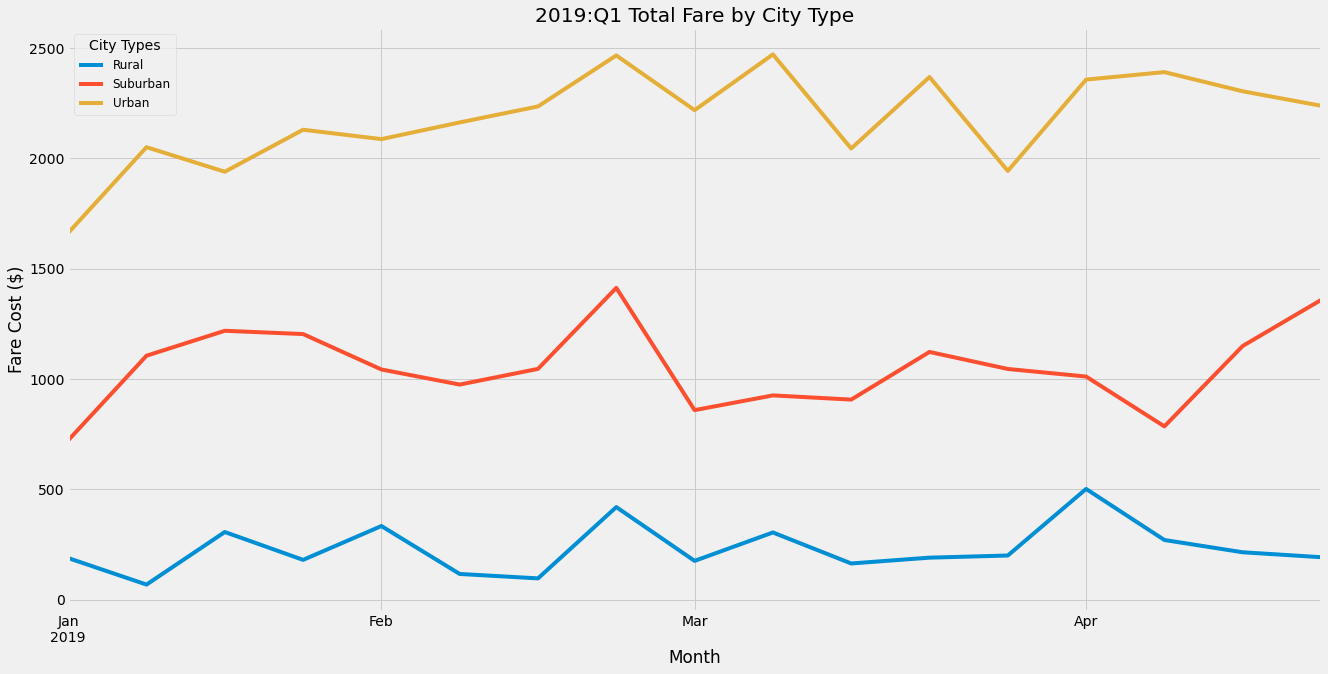

In [118]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

loc_pivot_table_res.plot(figsize=(20,10))
plt.ylabel("Fare Cost ($)")
plt.xlabel("Month")
plt.title("2019:Q1 Total Fare by City Type")

lgnd = plt.legend(fontsize = 12, mode = "expanded", scatterpoints = 1, loc = "best", title = "City Types")
